### DATA PREPROGRESS

In [17]:
import re
import numpy as np
import json

def data_preprocess(filepath):
    # data_all = np.genfromtxt(filepath, delimiter=' ')
    # data = data_all[:8000]

    data = np.genfromtxt(filepath, delimiter=' ', dtype=float)

    for d in data:
        # d[0] = float(d[0] * 1000)
        # d[2] = float(d[2] * 1000)
        # d[3] = float(d[2] * 1000)
        # d[4] = float(d[2] * 1000)
        pass

    training_x = data[:, 1:]

    training_y = data[:, :1]

    return training_x, training_y

# Data preprocessing
file_path = "../training_data/trainingDataSet_CPU_v1_10.txt"
training_x, training_y = data_preprocess(file_path)

### MODEL COMPILE & FIT

In [18]:
### Data preprocessing using MinMaxScaler
# create MinMaxScaler Object
# x_scaler = MinMaxScaler()
# y_scaler = MinMaxScaler()


# scaled_training_x = training_x[:, 0].reshape(-1, 1)
# scaled_training_y = training_y[:].reshape(-1, 1)

# training_x[:, 0] = scaled_training_x[:, 0]
# training_y = scaled_training_y

# Define the split points based on time
train_size = int(len(training_x) * 0.8)
val_size = int(len(training_x) * 0.1)

# Split the data
x_train = training_x[:train_size]
y_train = training_y[:train_size]

x_val = training_x[train_size + val_size:]
y_val = training_y[train_size + val_size:]


# test data from other file
x_test = training_x[:train_size + val_size]
y_test = training_y[:train_size + val_size]

# x_train_first_column = x_train[:, 0].reshape(-1, 1)
# scaled_x_train_first_column = x_scaler.fit_transform(x_train_first_column)
# x_train[:, 0] = scaled_x_train_first_column.flatten()
# y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))  # reshap to 2D

# make the same sacling on valid data set and test data set
# x_val_scaled = x_scaler.transform(x_val)
# x_val_first_column = x_val[:, 0].reshape(-1, 1)
# scaled_x_val_first_column = x_scaler.fit_transform(x_val_first_column)
# x_val[:, 0] = scaled_x_val_first_column.flatten()
# y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1))  # reshap to 2D


# x_test_first_column = x_test[:, 0].reshape(-1, 1)
# scaled_x_test_first_column = x_scaler.fit_transform(x_test_first_column)
# x_test[:, 0] = scaled_x_test_first_column.flatten()
# y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))  # reshap to 2D


### NORMALIZATION

In [19]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.callbacks import Callback, EarlyStopping
from keras.optimizers import Adam


def create_sequences(dataset_x, dataset_y, time_steps):
    dataX, dataY = [], []

    # scale for data set
    if dataset_x.shape[0] < time_steps:
        # Handle the case where the input data is smaller than time_steps
        # You can choose to pad the sequence or handle it in a way that makes sense for your data
        # For example, you can replicate the single time step to create a sequence
        x_sequence = np.tile(dataset_x, (time_steps, 1))
        y_sequence = np.tile(dataset_y, (time_steps, 1))
        dataX.append(x_sequence)
        dataY.append(y_sequence)
    else:
        for i in range(dataset_x.shape[0] - time_steps + 1):
            x_sequence = dataset_x[i:i + time_steps, :]
            y_sequence = dataset_y[i + time_steps - 1]
            dataX.append(x_sequence)
            dataY.append(y_sequence)

    return np.array(dataX), np.array(dataY)

# Create sequences for each set
time_steps = 150


# x_test = training_x[train_size:]
# y_test = one_hot_encoding[train_size:]

# Create sequences for each set
x_train_sequences, y_train_sequences = create_sequences(x_train, y_train, time_steps)
x_val_sequences, y_val_sequences = create_sequences(x_val, y_val, time_steps)
x_test_sequences, y_test_sequences = create_sequences(x_test, y_test, time_steps)


# Initialize LossHistory with validation data
class LossHistory(Callback):
    def __init__(self, x_train, y_train, x_val, y_val):
        super().__init__()
        self.train_data = (x_train, y_train)
        self.validation_data = (x_val, y_val)
        self.losses = []
        self.val_losses = []
        self.train_errors = []
        self.val_errors = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs['loss'])
        self.val_losses.append(logs.get('val_loss'))
        self.train_errors.append(logs.get('mean_absolute_error'))
        self.val_errors.append(logs.get('val_mean_absolute_error'))

### FITTING

epochs: 200
batch: 128
units: 50
hidden layers: 3
Epoch 1/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 118s 366ms/step - loss: 33.5807 - mean_absolute_error: 4.2118 - val_loss: 32.1624 - val_mean_absolute_error: 4.1587
Epoch 2/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 105s 338ms/step - loss: 32.5672 - mean_absolute_error: 4.1554 - val_loss: 32.6018 - val_mean_absolute_error: 4.4219
Epoch 3/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 108s 347ms/step - loss: 32.2170 - mean_absolute_error: 4.1534 - val_loss: 32.6349 - val_mean_absolute_error: 4.4310
Epoch 4/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 109s 349ms/step - loss: 32.5706 - mean_absolute_error: 4.1820 - val_loss: 32.9297 - val_mean_absolute_error: 4.5031
Epoch 5/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 110s 351ms/step - loss: 32.6861 - mean_absolute_error: 4.1839 - val_loss: 32.2803 - val_mean_absolute_error: 4.0905
Epoch 6/200
312/312 ━━━━━━━━━━━━━━━━━━━━ 107s 343ms/step - loss: 32.8327 - mean_absolute_error: 4.1579 - val_loss: 32.2689 - val_mean_absolute_error: 4.3045
Epoch 7/

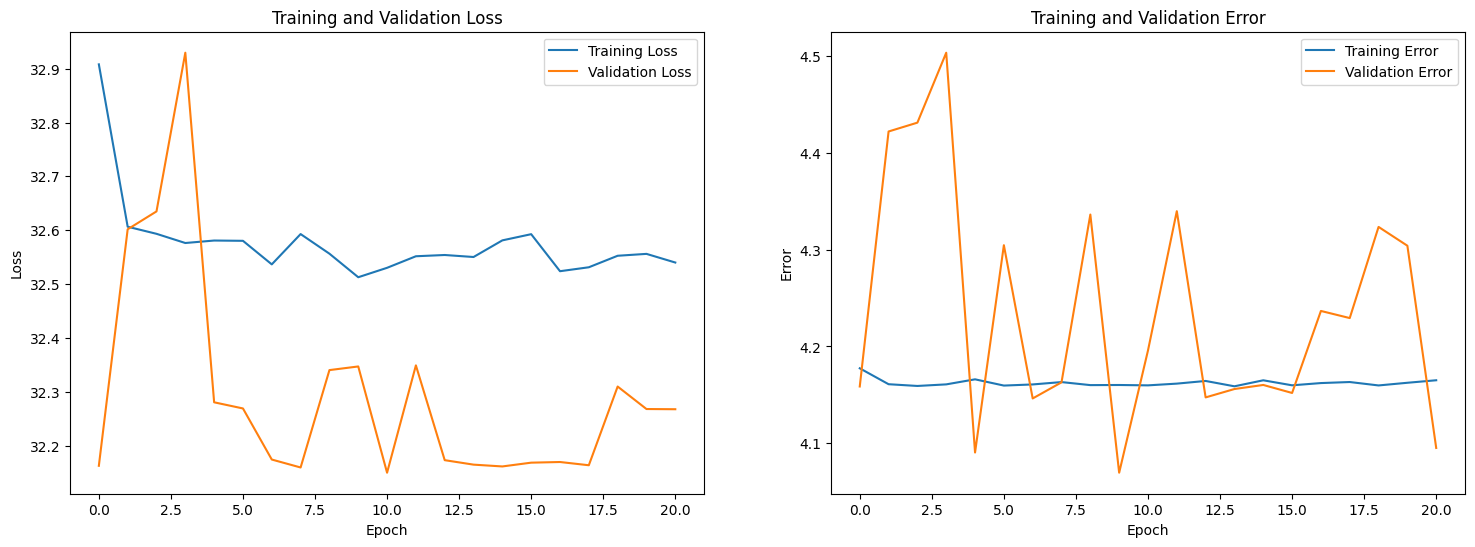

1402/1402 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step
MAE: 4.264911983093475
pred: [5.8232446] | real: [1.09809041]
pred: [5.8232446] | real: [2.73617363]
pred: [5.8232446] | real: [7.92254782]
pred: [5.8232446] | real: [12.83594465]
pred: [5.8232446] | real: [3.39875412]
pred: [5.8232446] | real: [1.64767361]
pred: [5.8232446] | real: [2.93100524]
pred: [5.8232446] | real: [3.94398141]
pred: [5.8232446] | real: [2.03648949]
pred: [5.8232446] | real: [3.94711685]
pred: [5.8232446] | real: [4.53741932]
pred: [5.8232446] | real: [10.73032475]
pred: [5.8232446] | real: [10.89683723]
pred: [5.8232446] | real: [2.68102169]
pred: [5.8232446] | real: [3.75621986]
pred: [5.8232446] | real: [3.72790217]
pred: [5.8232446] | real: [5.11010432]
pred: [5.8232446] | real: [8.5966692]
pred: [5.8232446] | real: [1.34583116]
pred: [5.8232446] | real: [7.98748684]
pred: [5.8232446] | real: [1.91962719]
pred: [5.8232446] | real: [5.46956158]
pred: [5.8232446] | real: [6.30791235]
pred: [5.8232446] | real: [8.9223

In [20]:
from keras.callbacks import TensorBoard
import os
import datetime

# log
log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


def add_hidden_layer(model, units, activation, layers):

    if layers > 1:

        for layer in range(layers - 1):

            model.add(LSTM(units=units, activation=activation, return_sequences=True))
            model.add(Dropout(0.3))

    model.add(LSTM(units=units, activation=activation, return_sequences=False))


# loop params

LSTM_units = 50

Stop_patience = 10

Batch_size = 128

Learning_rate = 1e-2

Epochs = 200

Layers = 3

Activation = "tanh"


# loss_function = 'mean_absolute_error'  # Assuming you are doing regression

# loss_function = 'categorical_crossentropy'

# loss_function = 'sparse_categorical_crossentropy'

loss_function = 'mean_squared_error'


# Initialize LossHistory with validation data

history = LossHistory(x_train_sequences, y_train_sequences, x_val_sequences, y_val_sequences)



def model_fit():


    print("epochs:", Epochs)

    print("batch:", Batch_size)

    print("units:", LSTM_units)


    # Build LSTM model

    model = Sequential()

    # Adding LSTM layer with L2 regularization
    model.add(Input(shape=(x_train_sequences.shape[1], x_train_sequences.shape[2])))

    model.add(LSTM(units=LSTM_units, activation=Activation, recurrent_activation="sigmoid", return_sequences=True))  # Regularization on the weights


    add_hidden_layer(model, LSTM_units, Activation, Layers)

    print("hidden layers:", Layers)


    # full con layer

    model.add(Dense(units=32))

    model.add(Dense(units=1))


    # Compile model

    model.compile(optimizer=Adam(learning_rate=Learning_rate), loss=loss_function, metrics=['mean_absolute_error'])


    # Define early stopping

    early_stopping = EarlyStopping(monitor='val_loss', patience=Stop_patience, restore_best_weights=True)

    # early_stopping = EarlyStopping(monitor='val_mean_absolute_error', patience=Stop_patience, restore_best_weights=True)


    # Train the model with early stopping

    model.fit(x_train_sequences, y_train_sequences, epochs=Epochs, batch_size=Batch_size,

            validation_data=(x_val_sequences, y_val_sequences), callbacks=[history, early_stopping, tensorboard_callback])


    prediction_results = model.predict(x_test_sequences)


    _abs = np.abs(y_test_sequences - prediction_results)

    mae = np.mean(_abs)


    print("MAE:", mae)


    for i in range(40):

        print(f"pred: {prediction_results[i]} | real: {y_test_sequences[i]}")


model_fit()


# MSE

# mse = mean_squared_error(y_test, prediction_results)

# print("Mean Squared Error:", mse)


# RMSE

# rmse = np.sqrt(mse)

# print("Mean Squared Error:", mse)


# MAE

# mae = mean_absolute_error(y_test_sequences, prediction_results)

# print("Mean Absoluted Error:", mae)


# from sklearn.metrics import mean_squared_error


# mse = mean_squared_error(y_test_sequences, prediction_results)

# print("Mean Squared Error:", mse)

### SAVE MODEL

In [22]:
# Save the model
    # model.save("/content/drive/MyDrive/LSTM/predict_model_2_0v.keras")